In [1]:
import warnings
# warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
import tensorflow as tf

import glob
import keras
from datetime import datetime
import time
# from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.stattools import pacf
%matplotlib inline
from matplotlib.pylab import rcParams
# import seaborn as sns
rcParams['figure.figsize']=15,5

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import math

In [3]:
# seed=1226 = 0.98
seed=1226

In [4]:
from time import time

import numpy as np
import pandas as pd


# For plotting
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,7)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
Stations = ['Data20Nov','Data23Nov2','Data23Nov1','Data24Nov','Data24Nov2','Data25Nov','Data29Nov','Data1Dec','Data2Dec','Data3Dec']

In [6]:
#Rearrange the Array
def makeArray(Array):
    New=np.array(Array[0])

    for i in range(1,len(Array)):
        New = np.append(New,Array[i],axis=0)
        
    return New

In [7]:
def readData(Stations):
    
    Data, C = [], []
    
#     print(Stations)
    file = Stations+'.csv'
    newfile = file
    df = pd.read_csv('dataset/'+newfile, header=0, index_col=None)
    print(newfile)
    df = df.reset_index(drop=True)
    data=df[['Present_AX','Present_Ay','Present_AZ']].values
    data=data.astype('float32')
    data=data[:,0]**2+data[:,1]**2+data[:,2]**2
    data=np.sqrt(data)
    data=data.reshape((-1,1))
    count=df['Change'].values
    count=count.astype('float32')
    count=count.reshape((-1,1))

#     #Normalize the data
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     data = scaler.fit_transform(data)

    Data.append(data)
    C.append(count)
           
    
        
    return makeArray(Data), makeArray(C)



In [8]:
Data=[[] for x in range(len(Stations))]
Count=[[] for x in range(len(Stations))]
for i in range(len(Stations)):
    Data[i], Count[i] = readData(Stations[i])

Data20Nov.csv
Data23Nov2.csv
Data23Nov1.csv
Data24Nov.csv
Data24Nov2.csv
Data25Nov.csv
Data29Nov.csv
Data1Dec.csv
Data2Dec.csv
Data3Dec.csv


In [9]:
for i in range(10):
    print(Data[i].shape)

(28699, 1)
(44972, 1)
(13357, 1)
(9227, 1)
(18083, 1)
(12494, 1)
(16510, 1)
(3161, 1)
(3567, 1)
(1772, 1)


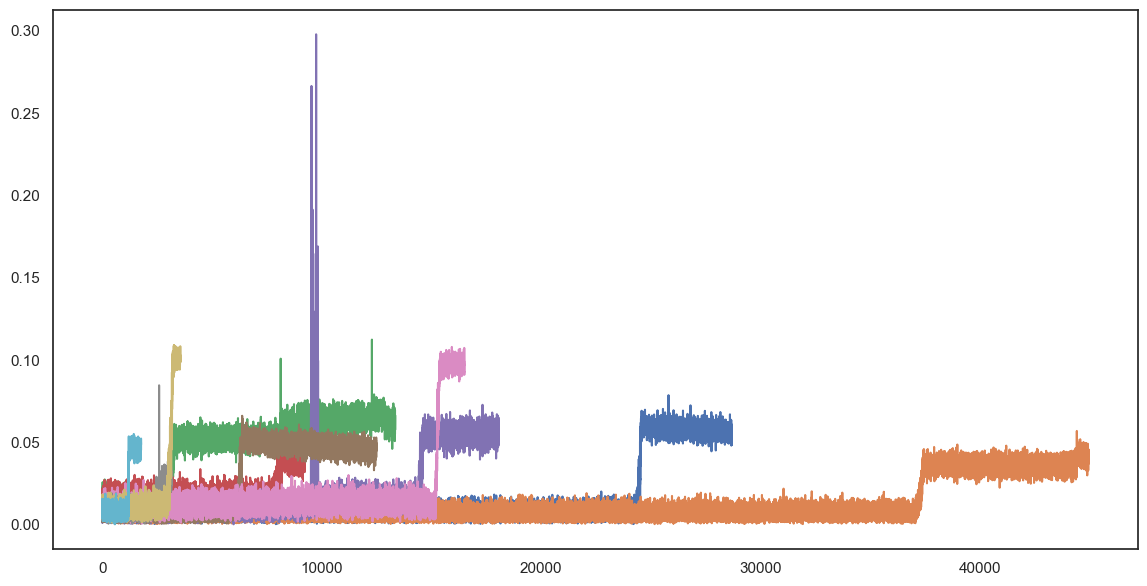

In [10]:
for i in range(10):
    plt.plot(Data[i])


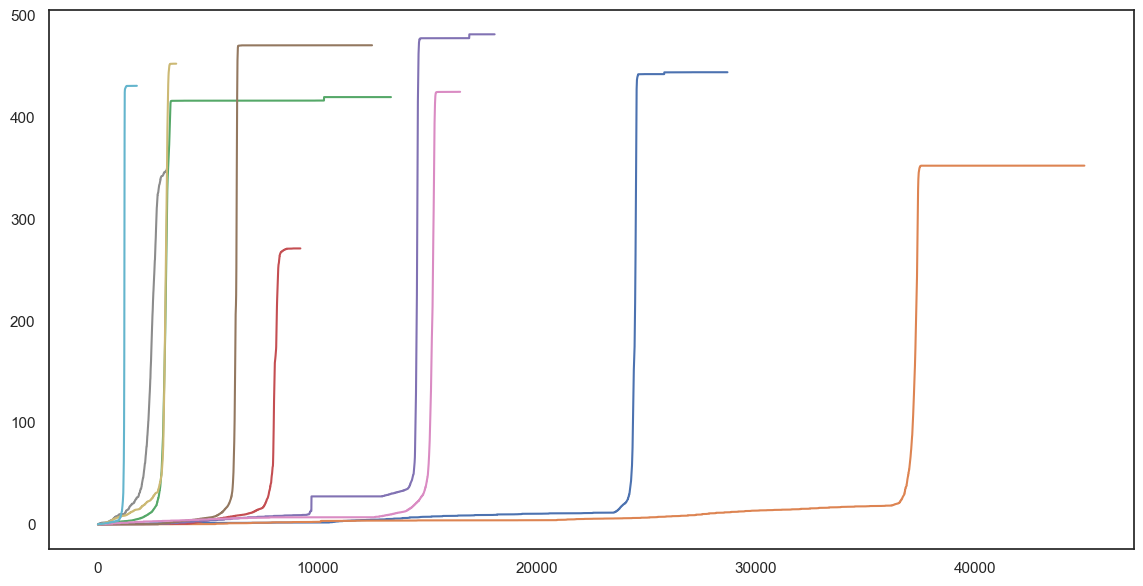

In [11]:
for i in range(10):
    plt.plot(np.cumsum(Count[i]))


In [12]:
def readData2(Stations):
    
    Data, C = [], []
    
#     print(Stations)
    file = Stations+'.csv'
    newfile = file
    df = pd.read_csv('dataset/'+newfile, header=0, index_col=None)
    print(newfile)
    df = df.reset_index(drop=True)
    data=df[['Present_AX','Present_Ay','Present_AZ']].values
    data=data.astype('float32')
#     data=data[:,0]**2+data[:,1]**2+data[:,2]**2
#     data=np.sqrt(data)
#     data=data.reshape((-1,1))
    count=df['Corrected'].values
    count=count.astype('float32')
    count=count.reshape((-1,1))

#     #Normalize the data
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     data = scaler.fit_transform(data)

    Data.append(data)
    C.append(count)
           
    
        
    return makeArray(Data), makeArray(C)



In [13]:
Data=[[] for x in range(len(Stations))]
Count=[[] for x in range(len(Stations))]
for i in range(len(Stations)):
    Data[i], Count[i] = readData2(Stations[i])

Data20Nov.csv
Data23Nov2.csv
Data23Nov1.csv
Data24Nov.csv
Data24Nov2.csv
Data25Nov.csv
Data29Nov.csv
Data1Dec.csv
Data2Dec.csv
Data3Dec.csv


In [14]:
Data[0]

array([[ 0.0034, -0.0022, -0.0012],
       [ 0.0034, -0.0035, -0.0093],
       [ 0.0042,  0.0029, -0.0019],
       ...,
       [-0.0073, -0.0489,  0.0247],
       [-0.0088, -0.0523,  0.0225],
       [-0.0117, -0.0513,  0.0271]], dtype=float32)

In [15]:
Count[0]

array([[  0.  ],
       [  0.  ],
       [  0.  ],
       ...,
       [443.86],
       [443.86],
       [443.86]], dtype=float32)

In [16]:
# D=Data[0][1:]-Data[0][:-1]
# D[np.where((D[:,0]<0.02) & (D[:,0]>-0.02)),0]=0
# D[np.where((D[:,1]<0.02) & (D[:,1]>-0.02)),1]=0
# D[np.where((D[:,2]<0.02) & (D[:,2]>-0.02)),2]=0
# plt.plot(D)
# Data[0]=D

In [17]:
def makePacket(data,label,lag):
    D,L=[],[]
    length=len(data)
    for i in range(length-lag+1):
        D.append(data[i:lag+i,:])
        L.append(label[lag+i-1]-label[i])     
    return np.array(D),np.array(L)
        

In [18]:
lag=3

In [19]:
Input, Label = [], []
for i in range(10):
    D,L=makePacket(Data[i],Count[i],lag)
    Input.append(D)
    Label.append(L)

In [20]:
Input=np.array(Input)
Label=np.array(Label)

In [21]:
D=np.vstack(Input[:7])
M=np.vstack(Input[7:])
L=np.vstack(Label[:7])
N=np.vstack(Label[7:])

In [22]:
D.shape

(143328, 3, 3)

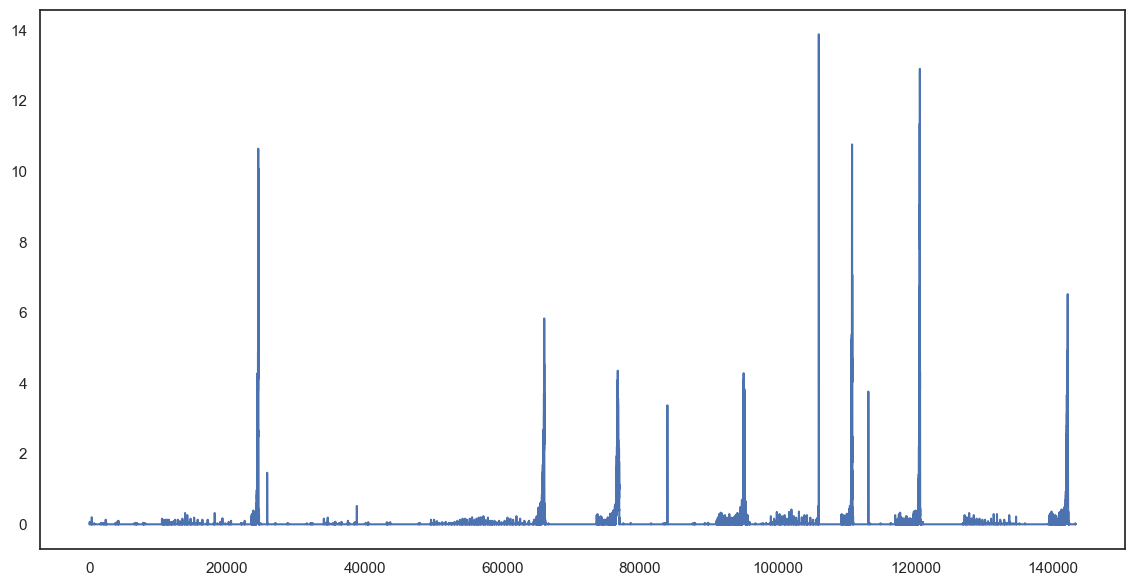

In [23]:
plt.plot(L)

In [24]:
D.shape

(143328, 3, 3)

In [25]:
from keras.models import Sequential, load_model, save_model
from keras.layers import Dense,Input,Reshape, Flatten,ELU,RepeatVector,TimeDistributed
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, Embedding, multiply
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras import backend as K

In [26]:
# define encoder
visible = Input(shape=(lag,3))
encoder = LSTM(100, activation='tanh',return_sequences=True)(visible)
encoder = LSTM(50, activation='relu')(encoder)
# decoder2 = TimeDistributed(Dense(100))(encoder)
# decoder2 = Flatten()(decoder2)
decoder2 = Dense(10,activation='relu')(encoder)
# decoder2 = Dense(7,activation='relu')(decoder2)
decoder2 = Dense(1,name='output')(decoder2)
# tie it together
final = Model(inputs=visible, outputs=decoder2)

Metal device set to: Apple M1 Pro


In [27]:
tf.random.set_seed(seed)
np.random.seed(seed)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=100, restore_best_weights=True)]
final.compile(optimizer='adam', loss='mse')
final.fit(D,L, epochs=500, batch_size=512,  verbose=1, validation_data=(M,N),shuffle=True,callbacks=callbacks)

Epoch 1/500
280/280 [==============================] - 11s 34ms/step - loss: 0.1420 - val_loss: 2.4842
Epoch 2/500
280/280 [==============================] - 9s 32ms/step - loss: 0.1407 - val_loss: 2.4414
Epoch 3/500
280/280 [==============================] - 10s 35ms/step - loss: 0.1358 - val_loss: 2.4101
Epoch 4/500
280/280 [==============================] - 9s 34ms/step - loss: 0.1304 - val_loss: 2.4701
Epoch 5/500
280/280 [==============================] - 9s 31ms/step - loss: 0.1271 - val_loss: 2.4607
Epoch 6/500
280/280 [==============================] - 9s 31ms/step - loss: 0.1253 - val_loss: 2.6045
Epoch 7/500
280/280 [==============================] - 9s 31ms/step - loss: 0.1230 - val_loss: 2.5306
Epoch 8/500
280/280 [==============================] - 9s 31ms/step - loss: 0.1223 - val_loss: 2.5650
Epoch 9/500
280/280 [==============================] - 9s 31ms/step - loss: 0.1224 - val_loss: 2.5870
Epoch 10/500
280/280 [==============================] - 9s 31ms/step - loss: 0.1

280/280 [==============================] - 9s 31ms/step - loss: 0.0382 - val_loss: 2.1986
Epoch 160/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0374 - val_loss: 2.1576
Epoch 161/500
280/280 [==============================] - 9s 31ms/step - loss: 0.0366 - val_loss: 2.9257
Epoch 162/500
280/280 [==============================] - 9s 31ms/step - loss: 0.0373 - val_loss: 2.6827
Epoch 163/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0368 - val_loss: 2.1071
Epoch 164/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0366 - val_loss: 2.0869
Epoch 165/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0369 - val_loss: 2.1376
Epoch 166/500
280/280 [==============================] - 9s 31ms/step - loss: 0.0355 - val_loss: 2.1514
Epoch 167/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0348 - val_loss: 2.2300
Epoch 168/500
280/280 [==============================] - 9s 32ms/step - loss: 

Epoch 238/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0264 - val_loss: 2.1088
Epoch 239/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0262 - val_loss: 2.0656
Epoch 240/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0259 - val_loss: 2.0038
Epoch 241/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0268 - val_loss: 2.1059
Epoch 242/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0266 - val_loss: 2.0505
Epoch 243/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0264 - val_loss: 2.1831
Epoch 244/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0248 - val_loss: 2.2857
Epoch 245/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0265 - val_loss: 2.2631
Epoch 246/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0257 - val_loss: 2.0927
Epoch 247/500
280/280 [==============================] - 9s 33ms

Epoch 317/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0210 - val_loss: 2.2528
Epoch 318/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0206 - val_loss: 2.1341
Epoch 319/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0249 - val_loss: 2.0432
Epoch 320/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0234 - val_loss: 2.2197
Epoch 321/500
280/280 [==============================] - 9s 32ms/step - loss: 0.0207 - val_loss: 2.1793
Epoch 322/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0198 - val_loss: 2.2504
Epoch 323/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0212 - val_loss: 2.2160
Epoch 324/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0202 - val_loss: 2.4395
Epoch 325/500
280/280 [==============================] - 9s 33ms/step - loss: 0.0195 - val_loss: 2.2637
Epoch 326/500
280/280 [==============================] - 9s 32ms

897/897 [==============================] - 7s 7ms/step


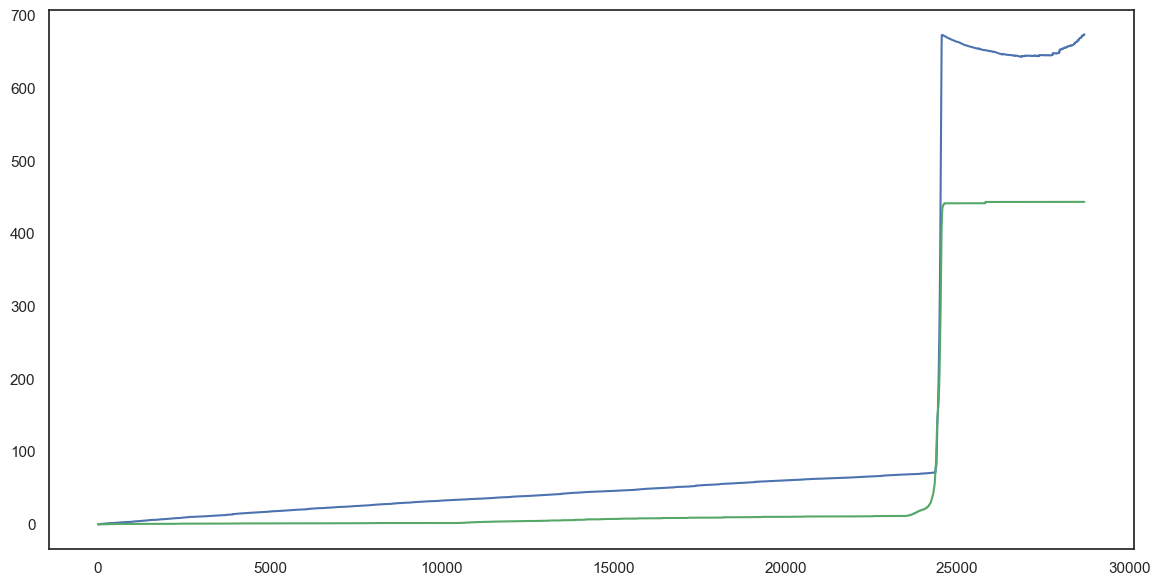

In [28]:
st=0
A,B=makePacket(Data[st],Count[st],lag)
P = final.predict(A)
plt.plot(np.cumsum(P))
# plt.plot(np.cumsum(L),color='r')
plt.plot(Count[st],color='g')

1406/1406 [==============================] - 10s 7ms/step


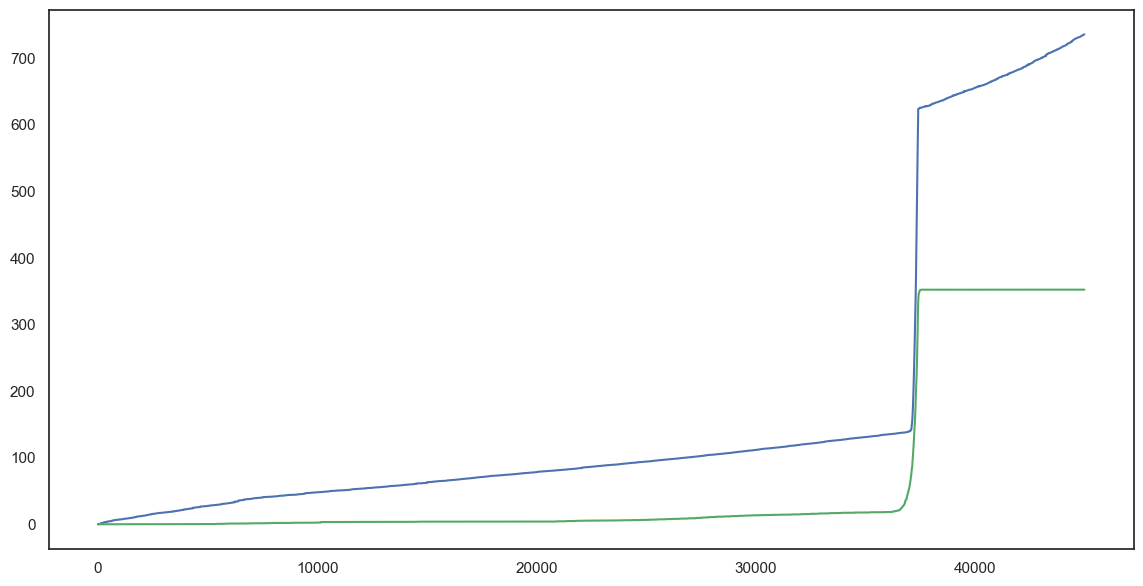

In [29]:
st=1
A,B=makePacket(Data[st],Count[st],lag)
P = final.predict(A)
plt.plot(np.cumsum(P))
# plt.plot(np.cumsum(L),color='r')
plt.plot(Count[st],color='g')

418/418 [==============================] - 3s 7ms/step


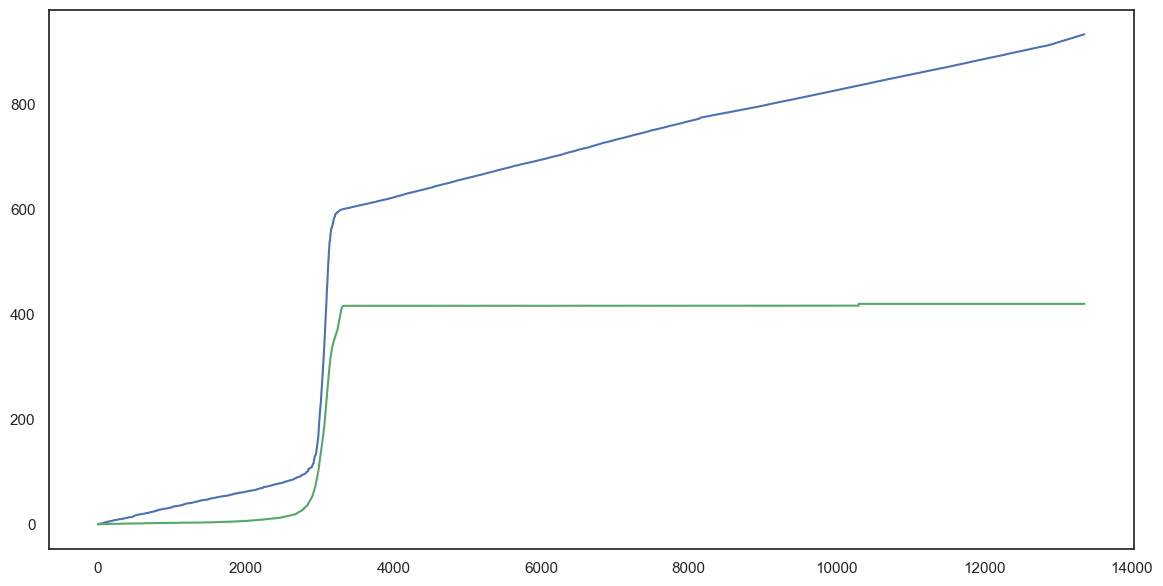

In [30]:
st=2
A,B=makePacket(Data[st],Count[st],lag)
P = final.predict(A)
plt.plot(np.cumsum(P))
# plt.plot(np.cumsum(L),color='r')
plt.plot(Count[st],color='g')

289/289 [==============================] - 2s 7ms/step


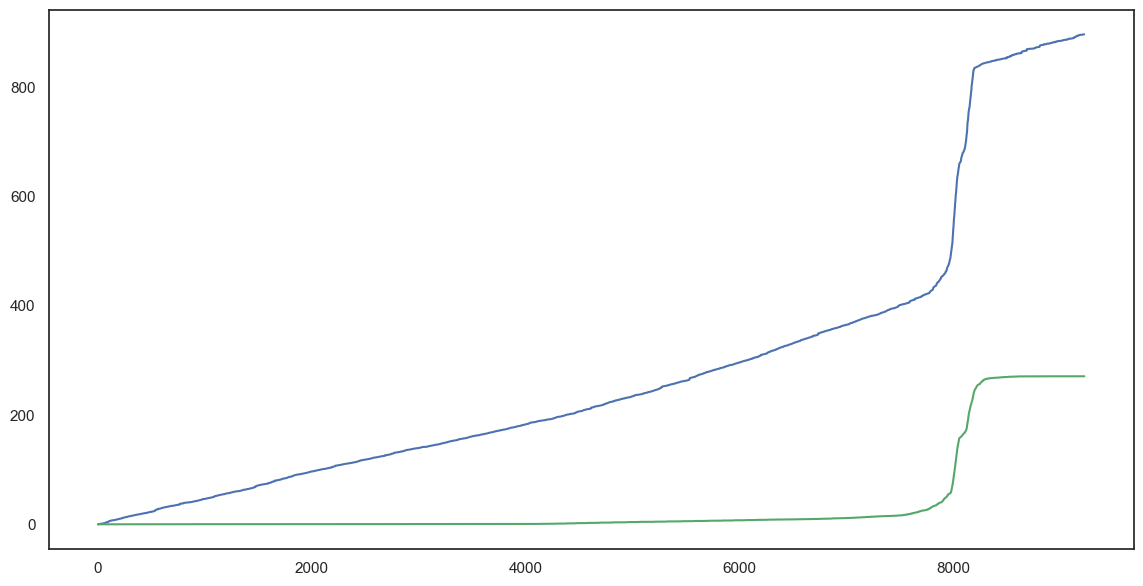

In [31]:
st=3
A,B=makePacket(Data[st],Count[st],lag)
P = final.predict(A)
plt.plot(np.cumsum(P))
# plt.plot(np.cumsum(L),color='r')
plt.plot(Count[st],color='g')

566/566 [==============================] - 4s 7ms/step


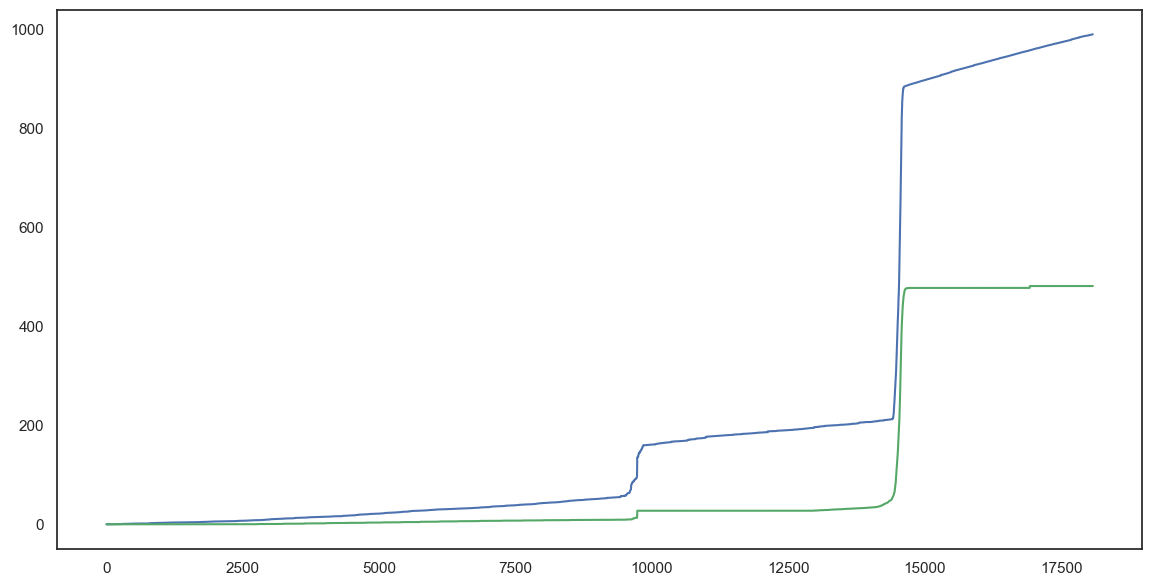

In [32]:
st=4
A,B=makePacket(Data[st],Count[st],lag)
P = final.predict(A)
plt.plot(np.cumsum(P))
# plt.plot(np.cumsum(L),color='r')
plt.plot(Count[st],color='g')

391/391 [==============================] - 3s 7ms/step


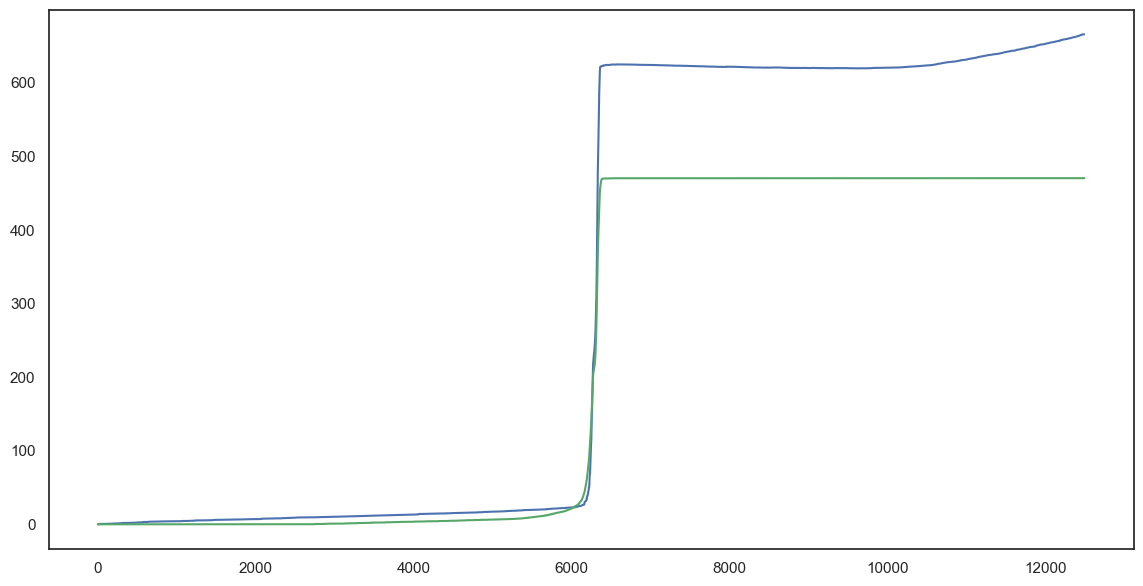

In [33]:
st=5
A,B=makePacket(Data[st],Count[st],lag)
P = final.predict(A)
plt.plot(np.cumsum(P))
# plt.plot(np.cumsum(L),color='r')
plt.plot(Count[st],color='g')

516/516 [==============================] - 4s 7ms/step


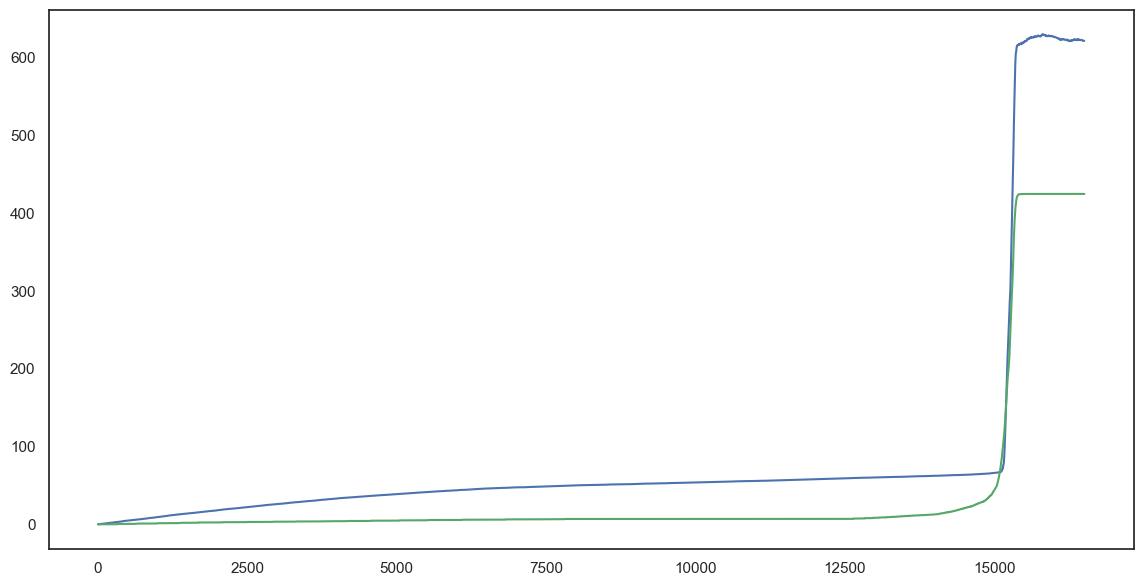

In [34]:
st=6
A,B=makePacket(Data[st],Count[st],lag)
P = final.predict(A)
plt.plot(np.cumsum(P))
# plt.plot(np.cumsum(L),color='r')
plt.plot(Count[st],color='g')

99/99 [==============================] - 1s 8ms/step


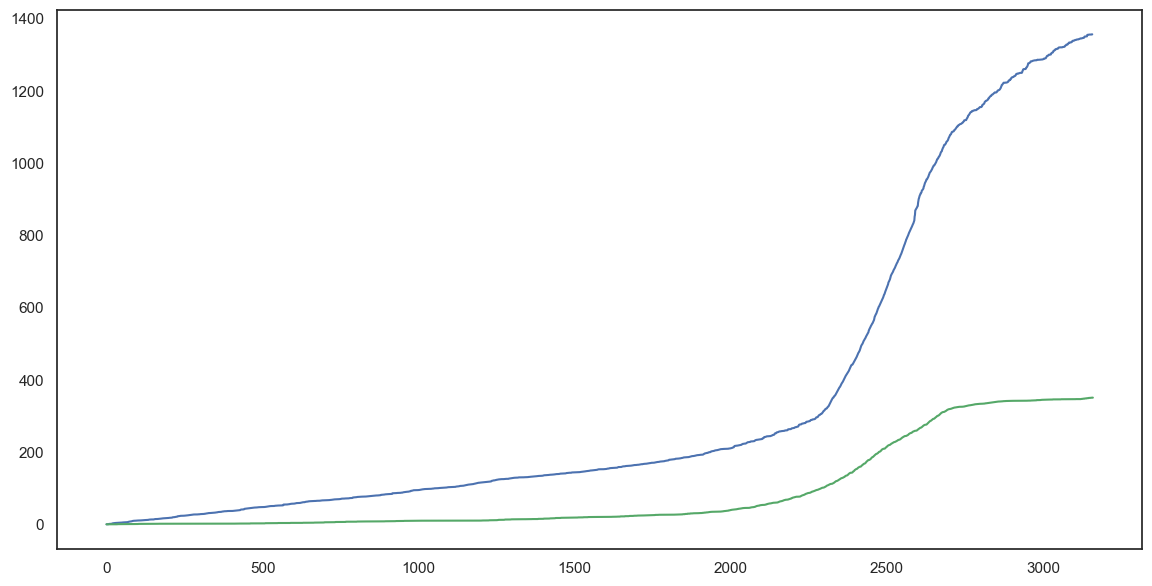

In [35]:
st=7
A,B=makePacket(Data[st],Count[st],lag)
P = final.predict(A)
plt.plot(np.cumsum(P))
# plt.plot(np.cumsum(L),color='r')
plt.plot(Count[st],color='g')

112/112 [==============================] - 1s 8ms/step


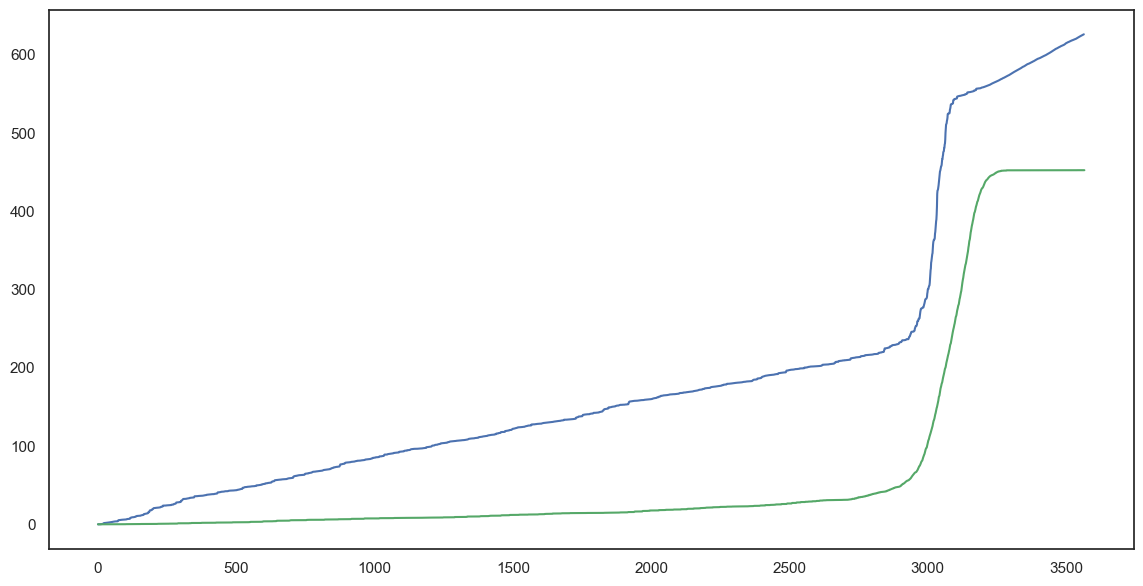

In [36]:
st=8
A,B=makePacket(Data[st],Count[st],lag)
P = final.predict(A)
plt.plot(np.cumsum(P))
# plt.plot(np.cumsum(L),color='r')
plt.plot(Count[st],color='g')

56/56 [==============================] - 0s 7ms/step


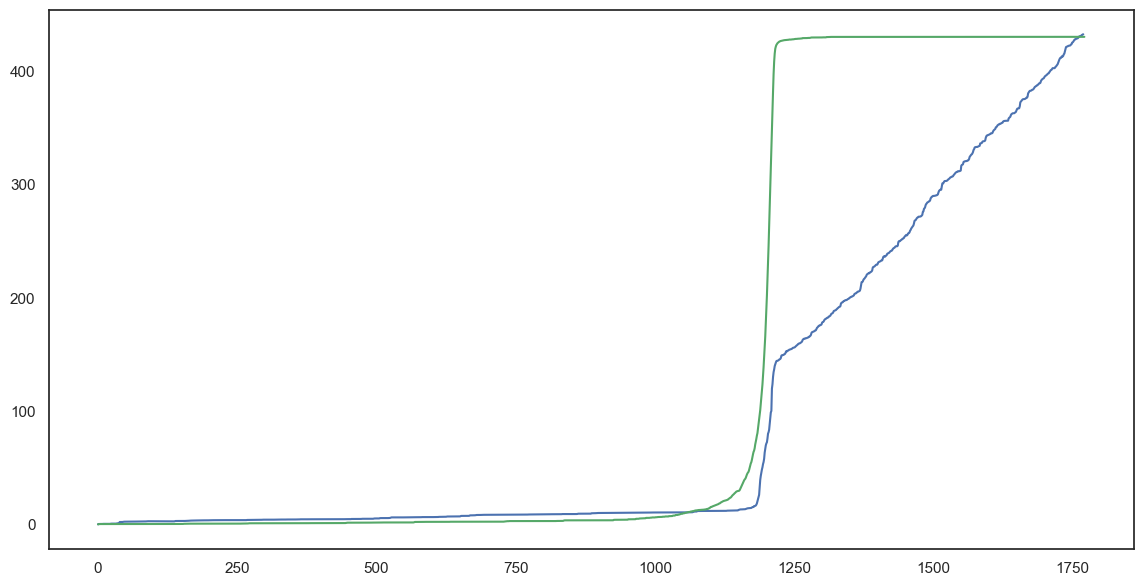

In [37]:
st=9
A,B=makePacket(Data[st],Count[st],lag)
P = final.predict(A)
plt.plot(np.cumsum(P))
# plt.plot(np.cumsum(L),color='r')
plt.plot(Count[st],color='g')